In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import graphviz


In [56]:
train_data = 'C:/YunTech/dataset/adult/adult.data'
test_data = 'C:/YunTech/dataset/adult/adult.test'
columns=['age', 'workclass', 'fnlgwt', 'education', 'educationnum', 'marital-status', 'occupation', 'relationship', 
         'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']
adult_data = pd.read_csv(train_data, names = columns)
# adult_test = pd.read_csv(test_data, names = columns, skiprows = 1)

In [57]:
adult_data.head()

,age,workclass,fnlgwt,education,educationnum,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
# adult_data.isnull().sum()
adult_data.isnull().sum()

age               0
workclass         0
fnlgwt            0
education         0
educationnum      0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [59]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educationnum    32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
adult_data['education'].dtypes

dtype('O')

In [62]:
for columns in adult_data:
    if adult_data[columns].dtypes == object:
        adult_data[columns] = le.fit_transform(adult_data[columns])

In [63]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlgwt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   educationnum    32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   gender          32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [64]:
adult_data.drop('fnlgwt', axis = 1, inplace =True)
# adult_test.drop('fnlgwt', axis = 1, inplace =True)
adult_data.head()

,age,workclass,education,educationnum,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


In [65]:
x = adult_data.iloc[:, :-1].values
y = adult_data.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [67]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0, 
                                    max_depth = None, 
                                    min_samples_split = 2, 
                                    min_samples_leaf = 1,
                                    min_weight_fraction_leaf = 0, 
                                    max_leaf_nodes = None,
                                    min_impurity_decrease = 0)

clf = model.fit(x_train, y_train)

In [68]:
import graphviz
dot_data = tree.export_graphviz(model, out_file = None,
                                feature_names = adult_data.columns[:-1],
                                max_depth = 4,
                                filled = True)


In [69]:
y_pred = clf.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7407
           1       0.62      0.61      0.61      2362

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.82      0.81      9769



In [71]:
accuracy = accuracy_score(y_test, y_pred)
print('Target accuracy:', accuracy)

Target accuracy: 0.8151294912478247


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

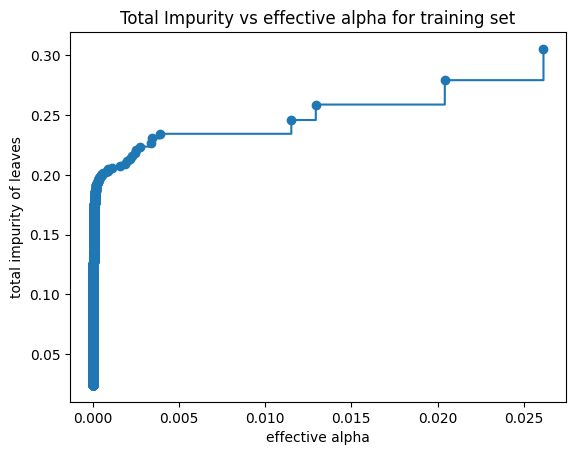

In [73]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05937091436009556


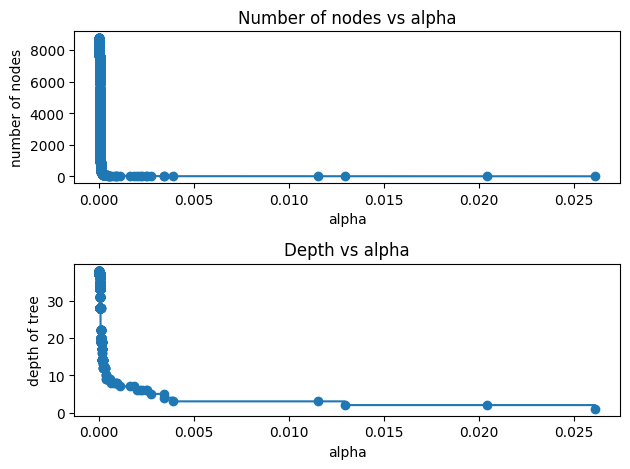

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()